In [1]:
import os
print(os.getcwd())

/content


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from gensim.models import Word2Vec # importing Word2Vec

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Conv1D, Dropout, SpatialDropout1D, LSTM, Embedding, GlobalMaxPool1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv('/content/drive/MyDrive/VarietyPredictionusingDescription/AssignmentData.csv')

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN,NaN
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,NaN,NaN


Dropping the last columns which have Nan Values and the first column which have index

In [5]:
df=df.drop('Unnamed: 0', inplace=False, axis=1)

In [6]:
df=df.dropna(axis=1, how="all", inplace=False)

In [7]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Finding all the non Unique description 

In [8]:
df['description'].nunique()

119955

In [9]:
duplicate = df[df.duplicated('description', keep=False)]

Showing the description which is repeated

In [10]:
duplicate['description'].value_counts()

Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level.                                                                                                                             3
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                                                                                                                                                   3
This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pom

Finding the duplicated values of Description and Variety 

In [11]:
vardescr = df[df.duplicated(['description', 'variety'],keep=False)]

In [12]:
duplicate[duplicate[['description', 'variety']].eq(vardescr[['description', 'variety']]).all(axis=1)==False]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
16162,Italy,This opens with subtle aromas of wild flower a...,Ventidue,93,35.0,Southern Italy,Fiano di Avellino,NaN,Kerin O’Keefe,@kerinokeefe,Villa Raiano 2014 Ventidue (Fiano di Avellino),Fiano,Villa Raiano
21810,Italy,"Vibrant and spicy, this savory red delivers ar...",Grotta Rossa,89,14.0,Sicily & Sardinia,Carignano del Sulcis,NaN,Kerin O’Keefe,@kerinokeefe,Cantina Santadi 2012 Grotta Rossa (Carignano ...,Carignano,Cantina Santadi
26490,Italy,This opens with subtle aromas of wild flower a...,Vigne di Sande,87,NaN,Veneto,Soave,NaN,Kerin O’Keefe,@kerinokeefe,Villa Canestrari 2016 Vigne di Sande (Soave),Garganega,Villa Canestrari
31584,Italy,"Vibrant and spicy, this savory red delivers ar...",Costera,90,18.0,Sicily & Sardinia,Cannonau di Sardegna,NaN,Kerin O’Keefe,@kerinokeefe,Argiolas 2013 Costera (Cannonau di Sardegna),Red Blend,Argiolas
33110,Argentina,"Stalky aromas suggest hay and green herbs, wit...",Finca La Niña,84,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Don Cristobal 1492 2010 Finca La Niña Cabernet...,Cabernet Sauvignon,Don Cristobal 1492
33463,Greece,"Aromas of citrus, melon and orange blossom sta...",NaN,88,15.0,Atalanti Valley,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Hatzimichalis 2015 Chardonnay (Atalanti Valley),Chardonnay,Hatzimichalis
36475,Italy,"Green bell pepper, red currant and dark spice ...",NaN,85,NaN,Northeastern Italy,Collio,NaN,Kerin O’Keefe,@kerinokeefe,Ca'Ronesca 2013 Pinot Nero (Collio),Pinot Nero,Ca'Ronesca
37160,Italy,The subdued nose eventually reveals black cher...,Marchese Montefusco,85,10.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Cantine Ermes 2014 Marchese Montefusco Nero d'...,Nero d'Avola,Cantine Ermes
51315,Australia,In 2009 this single vineyard offering includes...,Noble Baron,90,50.0,South Australia,Barossa,NaN,Joe Czerwinski,@JoeCz,Château Tanunda 2007 Noble Baron Cabernet Sauv...,Cabernet Sauvignon,Château Tanunda
52601,Italy,This offers aromas and flavors suggesting unri...,Vermentino del marchese,85,20.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Marchesi De Gregorio 2015 Vermentino del march...,White Blend,Marchesi De Gregorio


In [13]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Top Varieties

In [14]:
# top 20 varieties
top20df = pd.DataFrame(df['variety'].value_counts().head(20))

Unbalnced Variety column

In [15]:
top20df

,variety
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
Riesling,5189
Sauvignon Blanc,4967
Syrah,4142
Rosé,3564
Merlot,3102


In [16]:
# creating dataframe with the top 20 varieties
newdf = df[df['variety'].isin(top20df.index)]

In [17]:
# threshold of miniority variety to over sample (use sentences as document instead of the whole description)
minority_threshold = 5000 

# making a dataframe of the miniority classes
minority_df = newdf[newdf['variety'].isin(top20df[top20df <  minority_threshold].dropna().index)]
print(minority_df.shape)
print(len(minority_df['variety'].unique()))
minority_df.head(2)

(38367, 13)
14


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [18]:
import nltk

In [19]:
from nltk.tokenize import sent_tokenize # importing useful library

In [20]:
oversampled_miniority_lst = [] # empty list to store sentences as tokens miniority corpus

# creating a function to use sentences as tokens for the miniority classes
def over_sample_miniority(row):
    doc_list = sent_tokenize(row['description'])
    for sent in doc_list:
        row['description'] = sent
        oversampled_miniority_lst.append(list(row))

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
minority_df.apply(over_sample_miniority, axis=1); # over sample the miniority classes

In [23]:
oversampled_miniority_lst[:2]

[['Italy',
  'Aromas include tropical fruit, broom, brimstone and dried herb.',
  'Vulkà Bianco',
  87,
  nan,
  'Sicily & Sardinia',
  'Etna',
  nan,
  'Kerin O’Keefe',
  '@kerinokeefe',
  'Nicosia 2013 Vulkà Bianco  (Etna)',
  'White Blend',
  'Nicosia'],
 ['Italy',
  "The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
  'Vulkà Bianco',
  87,
  nan,
  'Sicily & Sardinia',
  'Etna',
  nan,
  'Kerin O’Keefe',
  '@kerinokeefe',
  'Nicosia 2013 Vulkà Bianco  (Etna)',
  'White Blend',
  'Nicosia']]

In [24]:
# converts oversampled_miniority_lst to a dataframe
oversampled_miniority_df = pd.DataFrame(oversampled_miniority_lst, columns=minority_df.columns)
oversampled_miniority_df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Italy,"The palate isn't overly expressive, offering u...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [25]:
# selecting majority classes as a dataframe to concatenate to oversampled_miniority_lst
majority_df = newdf[newdf['variety'].isin(top20df[top20df >= minority_threshold].dropna().index)]

# concatenates majority_df to oversampled_miniority_lst
balanced_df = pd.concat([majority_df, oversampled_miniority_df]) 
balanced_df = balanced_df.reset_index().drop('index', axis=1) # resets index
print(balanced_df.shape)
balanced_df.head(2)

(159648, 13)


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [26]:
balanced_df.isna().sum()

country                     69
description                  0
designation              43512
points                       0
price                     9325
province                    69
region_1                 25858
region_2                 95561
taster_name              30409
taster_twitter_handle    35171
title                        0
variety                      0
winery                       0
dtype: int64

In [27]:
balanced_variety = balanced_df['variety'].value_counts() # gets a Series of the variety count in balanced_df
balanced_variety

Pinot Noir                  13272
Sauvignon Blanc             12801
Chardonnay                  11753
Syrah                       11128
Cabernet Sauvignon           9472
Rosé                         9207
Red Blend                    8946
Nebbiolo                     8107
Malbec                       8047
Merlot                       7874
Portuguese Red               7734
Sangiovese                   7432
Bordeaux-style Red Blend     6915
Zinfandel                    6512
White Blend                  6034
Sparkling Blend              5740
Tempranillo                  5552
Riesling                     5189
Rhône-style Red Blend        3972
Pinot Gris                   3961
Name: variety, dtype: int64

In [28]:
newdf = balanced_df.copy()

In [29]:
newdf.fillna('', inplace=True)

In [30]:
balanced_df['not vintage'] = newdf['country'] + ' ' + newdf['designation'] + ' ' + newdf['province']+ ' ' + newdf['region_1'] + ' ' + newdf['region_2'] + ' ' + newdf['winery']

In [31]:
balanced_df['sentences'] = balanced_df['description'] + ' ' + balanced_df['not vintage']

In [32]:
balanced_df['sentences'][0]

'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish. US Reserve Late Harvest Michigan Lake Michigan Shore  St. Julian'

In [33]:
nlp = spacy.load("en_core_web_sm", disable=['tagger', 'parser', 'ner'])
spacy_stop_words = spacy.lang.en.STOP_WORDS # getting spacy's stop-words

Extra Stopwords

In [34]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [35]:
stop_words = list(set(list(spacy_stop_words) + stopwords))

In [36]:
# lemmatized stopwords
stopwords = list({word.lemma_.lower() for word in nlp(' '.join(stop_words))})

/usr/local/lib/python3.7/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [37]:
stopwords

['amount',
 'here',
 'beside',
 'among',
 'about',
 'to',
 'someone',
 'himself',
 'yours',
 'where',
 'up',
 'behind',
 'as',
 'make',
 'the',
 'except',
 'out',
 'under',
 'already',
 'have',
 'can',
 'for',
 'name',
 'many',
 'either',
 'keep',
 'having',
 'we',
 'ourselves',
 'nothing',
 'put',
 'sixty',
 'our',
 'seemed',
 'that',
 'upon',
 'back',
 'six',
 'at',
 'when',
 'give',
 'who',
 'off',
 'any',
 'on',
 'amongst',
 'whose',
 'thereafter',
 've',
 'in',
 'seeming',
 'down',
 'has',
 'me',
 'mine',
 'sometimes',
 'than',
 'all',
 'nine',
 'side',
 'now',
 'above',
 'becoming',
 'thereby',
 'same',
 'whence',
 'but',
 'serious',
 'yourself',
 'by',
 'what',
 'must',
 'various',
 'before',
 'thus',
 'm',
 'll',
 'itself',
 'again',
 'just',
 'those',
 'something',
 'hers',
 'hereupon',
 'he',
 'rather',
 'hereby',
 'toward',
 'afterwards',
 'your',
 'other',
 'over',
 'others',
 "n't",
 'should',
 'towards',
 'somehow',
 'am',
 'however',
 'may',
 'even',
 'during',
 'from',


In [38]:
# defining tokenzer function to tokenize the lower case lemma of documents in a corpus and 
# filter out stop-words  
def tokenizer_spacy(text):
    return [word.lemma_.lower() for word in nlp(text) if word.is_alpha and word.lemma_.lower() not in stopwords]

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold

In [40]:
sentences = balanced_df['sentences']
labels = balanced_df['variety']

In [41]:
# Label encoding
encode = LabelEncoder()
labels = encode.fit_transform(labels)

Converted Labels to Numerical Values

In [42]:
labels

array([11,  7,  1, ...,  6,  6,  6])

In [43]:
embedding_dim = 300
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

senten = []

for sentence in sentences:
  for word in stopwords:
    token = " " + word + " "
    sentence = sentence.lower().replace(token, " ")
    sentence = sentence.replace("  ", " ")
    sentence = sentence.replace("\xa0", " ")
  senten.append(sentence)

senten = [word for word in senten if word not in stopwords] # stopword filtering



In [44]:
senten = [' '.join(tokenizer_spacy(doc)) for doc in senten]

In [45]:
# after filtering
senten[0]

'pineapple rind lemon pith orange blossom start aromas palate bit opulent notes honey drizzled guava mango giving way slightly astringent semidry finish reserve late harvest michigan lake michigan shore st julian'

In [46]:
# word tokenizing
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(senten)

word_index = tokenizer.word_index

In [47]:
vocab_size = len(word_index)

In [48]:
# converting texts to numbers
training_sequences = tokenizer.texts_to_sequences(senten)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [49]:
# converting numbers to text, this is for the Word2vec model
senten_corpus = tokenizer.sequences_to_texts(training_sequences)


In [50]:
# The last 3 sentences
senten_corpus[-3:]

['weight solid powerful core spice baked apple flavors france alsace alsace domaine marcel deiss',
 'structure developing wine needs age france alsace alsace domaine marcel deiss',
 'drink france alsace alsace domaine marcel deiss']

In [51]:
sent_oversample_corpus = [doc.split() for doc in senten_corpus] # gets corpus as a list of lists

sent_oversample_corpus[:2]

[['pineapple',
  'rind',
  'lemon',
  'pith',
  'orange',
  'blossom',
  'start',
  'aromas',
  'palate',
  'bit',
  'opulent',
  'notes',
  'honey',
  'drizzled',
  'guava',
  'mango',
  'giving',
  'way',
  'slightly',
  'astringent',
  'semidry',
  'finish',
  'reserve',
  'late',
  'harvest',
  'michigan',
  'lake',
  'michigan',
  'shore',
  'st',
  'julian'],
 ['like',
  'regular',
  'bottling',
  'comes',
  'rough',
  'tannic',
  'rustic',
  'earthy',
  'herbal',
  'characteristics',
  'nonetheless',
  'think',
  'pleasantly',
  'unfussy',
  'country',
  'wine',
  'good',
  'companion',
  'hearty',
  'winter',
  'stew',
  'vintner',
  'reserve',
  'wild',
  'child',
  'block',
  'oregon',
  'willamette',
  'valley',
  'willamette',
  'valley',
  'sweet',
  'cheeks']]

In [52]:
# trains sent_oversample_corpus2 on Word2Vec. For sent_oversample_corpus2, min_count of 5 and iter (epoch) of 10 
# seems to be the best
sent_w2v_model = Word2Vec(sent_oversample_corpus, size=300, min_count=1, iter=10)

print(sent_w2v_model) # sumarizes the word2vec

Word2Vec(vocab=43551, size=300, alpha=0.025)


In [53]:
# just like king - man + woman = queen, we want to prove that portugal - estremadura + ontario = canada
print(sent_w2v_model.wv.most_similar(positive=['portugal', 'ontario'], negative=['estremadura']))

[('canada', 0.5040909647941589), ('oregon', 0.4164368510246277), ('lickable', 0.40702593326568604), ('germany', 0.3575240671634674), ('austria', 0.34323328733444214), ('mclean', 0.3335692286491394), ('substantial', 0.3324718475341797), ('lip', 0.32250985503196716), ('abondante', 0.3222897946834564), ('completely', 0.3156469166278839)]


In [54]:
def get_embedding_matrix(model, word_index):
    vocab_size = len(word_index) + 1
    embedding_dim = model.wv.vector_size
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    for word in model.wv.vocab:
        ind = word_index[word]
        embedding_matrix[ind] = model[word]
        
    return embedding_matrix

In [55]:
embedding_matrix = get_embedding_matrix(sent_w2v_model, word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [56]:
embedding_matrix.shape

(43553, 300)

In [57]:
def nlp_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length,  mask_zero=True, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [58]:
model = nlp_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          13065900  
                                                                 
 dropout (Dropout)           (None, 100, 300)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1442400   
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 600)               0         
                                                                 
 dense (Dense)               (None, 20)                12020     
                                                                 
Total params: 14,520,320
Trainable params: 1,454,420
Non-trainable params: 13,065,900
____________________________________

In [59]:
# creating class weights to reduce class imbalance
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(labels), class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes = np.unique(labels),
                                                 y = labels))) 

In [60]:
training_padded = np.array(training_padded)


num_epochs = 20

# earlystopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               min_delta=1e-4)

# ReduceLROnPlateau callback
lrp = tf.keraslrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                   factor=0.1,
                                   patience=2,
                                   cooldown=2,
                                   verbose=1)

# model training
history = model.fit(training_padded, labels, epochs=num_epochs, class_weight=class_weights, 
                    validation_split=0.25,
                    batch_size=128, verbose=1,
                    callbacks=[early_stopping, lrp])


Epoch 1/20
936/936 [==============================] - 39s 29ms/step - loss: 0.6988 - accuracy: 0.7701 - val_loss: 0.6745 - val_accuracy: 0.7810 - lr: 0.0010
Epoch 2/20
936/936 [==============================] - 25s 27ms/step - loss: 0.5020 - accuracy: 0.8288 - val_loss: 0.6544 - val_accuracy: 0.7876 - lr: 0.0010
Epoch 3/20
936/936 [==============================] - 24s 25ms/step - loss: 0.4478 - accuracy: 0.8463 - val_loss: 0.6429 - val_accuracy: 0.7931 - lr: 0.0010
Epoch 4/20
936/936 [==============================] - 24s 25ms/step - loss: 0.4158 - accuracy: 0.8541 - val_loss: 0.5998 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 5/20
936/936 [==============================] - 24s 25ms/step - loss: 0.3905 - accuracy: 0.8633 - val_loss: 0.5780 - val_accuracy: 0.8148 - lr: 0.0010
Epoch 6/20
936/936 [==============================] - 23s 25ms/step - loss: 0.3702 - accuracy: 0.8685 - val_loss: 0.5847 - val_accuracy: 0.8143 - lr: 0.0010
Epoch 7/20
935/936 [============================>.] - ETA:

In [67]:
from tensorflow import keras
keras.models.save_model(model,'/content/Predict_Variety_Wine.h5')


In [63]:
os.getcwd()

'/content'

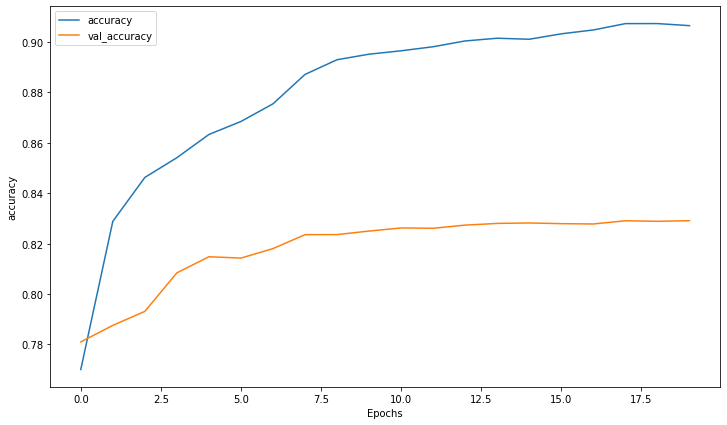

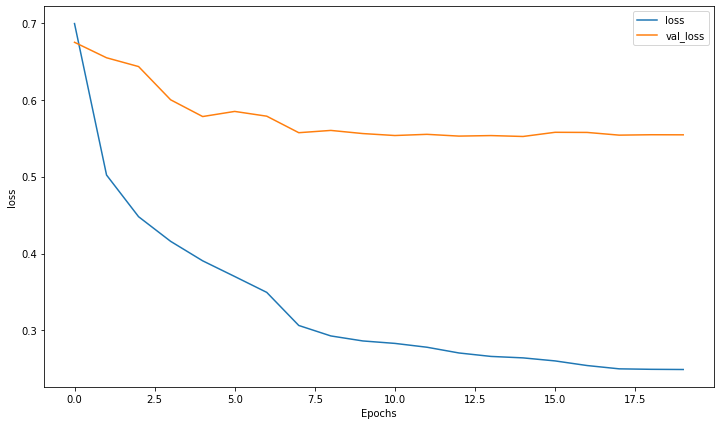

In [68]:
def plot_graphs(history, string):
  plt.figure(figsize=(12,7))
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [69]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(training_padded, labels, test_size=0.25, random_state=1)

In [73]:
y_predtrain = model.predict(X_train)
y_predtest = model.predict(X_test)
print(y_predtest)

[[3.0563762e-05 3.3725246e-03 1.9330464e-05 ... 6.5599002e-02
  2.1498225e-05 7.0511880e-03]
 [6.2125863e-13 2.1895505e-13 2.6871897e-13 ... 4.7396744e-09
  8.8240158e-11 5.4697569e-11]
 [8.7586303e-09 3.2102989e-09 2.4360897e-06 ... 4.1554522e-06
  9.9792898e-01 1.3130166e-08]
 ...
 [5.5200299e-08 3.6644582e-05 7.6237669e-08 ... 1.2043713e-04
  6.4900824e-08 9.9640346e-01]
 [5.6080971e-08 1.1067890e-06 9.1389381e-08 ... 4.1011958e-06
  2.4073865e-06 2.4375433e-05]
 [2.2360273e-05 4.5661829e-05 3.9835863e-06 ... 4.9672625e-04
  4.0882488e-04 4.8380037e-04]]


In [78]:
from sklearn.metrics import f1_score

In [80]:
y_predtest = [np.argmax(i) for i in y_predtest]

In [82]:
print('Testing F1 score: {:.4f}'.format(f1_score(y_test, y_predtest, average='weighted')))

Testing F1 score: 0.9122
